# 1. Import and Install Dependencies

In [3]:
!pip install tensorflow==2.12.1 opencv-python mediapipe scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [62]:
!pip install pyttsx3

In [7]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [97]:
import matplotlib
print(matplotlib.__version__)

3.9.2


In [98]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

from gtts import gTTS
from io import BytesIO
from pygame import mixer

# 2. Keypoints using MP Holistic

In [99]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [100]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [101]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [102]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open iris: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/iris_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/swrast_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/iris_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/swrast_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /home/jovanzac/ana

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [14]:
cap.release()
cv2.destroyAllWindows()

In [15]:
draw_landmarks(frame, results)

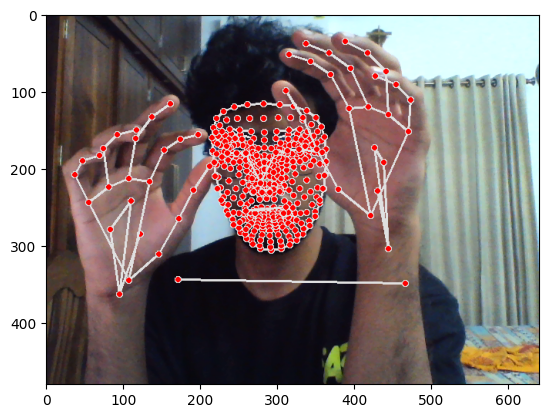

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

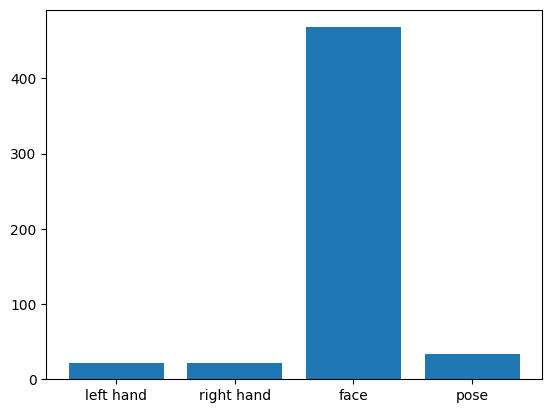

[21, 21, 468, 33]


In [17]:
lm_distribution = [
    len(i.landmark) for i in [
        results.left_hand_landmarks, results.right_hand_landmarks, results.face_landmarks, results.pose_landmarks
    ]
]

categories = ["left hand", "right hand", "face", "pose"]
plt.bar(categories, lm_distribution)

# Show the plot
plt.show()
print(lm_distribution)

In [18]:
print(sum([i*3 if i!=33 else i*4 for i in lm_distribution]))

1662


In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [103]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
len(result_test)

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.40322694,  0.64476585, -1.38121176, ..., -0.03028226,
        0.38910317, -0.08259458])

# 4. Setup Folders for Collection

In [104]:
if not os.path.exists("../MP_Data") :
    os.mkdir("../MP_Data")
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('../MP_Data') 

# Actions that we try to detect
actions = np.array(['explain', 'help', 'toilet', 'thank you', 'normal'])

# Sixty videos worth of data
no_sequences = 120

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [8]:
# NOTE: Only run this once. If you run it multiple times, delete the folders within MP_Data directory and run this cell once more

def create_training_data_structure() :
    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_path) :
            os.makedirs(action_path)
        if os.listdir(action_path) :
            dirmax = np.max(np.array(os.listdir(action_path)).astype(int))
        else :
            dirmax = 0
        for sequence in range(0, no_sequences):
            try: 
                os.makedirs(os.path.join(DATA_PATH, action, str(dirmax + sequence)))  # Create new directories
            except Exception as e:
                print(f"Exception observed: {e}")

# 5. Collect Keypoint Values for Training and Testing

In [22]:
cap = cv2.VideoCapture(0)
break_ = False

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        if break_ :
            break
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            if break_ :
                break
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break_ = True
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [105]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [106]:
label_map = {label:num for num, label in enumerate(actions)}

In [107]:
label_map

{'explain': 0, 'help': 1, 'toilet': 2, 'thank you': 3, 'normal': 4}

In [108]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [109]:
np.array(sequences).shape

(600, 30, 1662)

In [110]:
np.array(labels).shape

(600,)

In [111]:
X = np.array(sequences)

In [112]:
X.shape

(600, 30, 1662)

In [113]:
y = to_categorical(labels).astype(int)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [115]:
X_train.shape

(570, 30, 1662)

# 7. Build and Train LSTM Neural Network

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [118]:
# Early stopping
early_stopping = EarlyStopping(
    monitor='categorical_accuracy',              # Monitor validation loss
    patience=10,                 # Stop after 10 epochs of no improvement
    restore_best_weights=True    # Restore the best weights after stopping
)

## LSTM network with softmax as the final activation

In [27]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='elu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='elu'))
model.add(LSTM(64, return_sequences=False, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


2024-09-22 16:56:55.618036: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 113680800 exceeds 10% of free system memory.


18/18 [==============================] - 4s 62ms/step - loss: 2.7551 - categorical_accuracy: 0.2333
Epoch 2/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.2180 - categorical_accuracy: 0.4982
Epoch 3/2000
18/18 [==============================] - 1s 69ms/step - loss: 1.1240 - categorical_accuracy: 0.5018
Epoch 4/2000
18/18 [==============================] - 1s 82ms/step - loss: 0.9626 - categorical_accuracy: 0.5404
Epoch 5/2000
18/18 [==============================] - 1s 69ms/step - loss: 0.7533 - categorical_accuracy: 0.6684
Epoch 6/2000
18/18 [==============================] - 1s 71ms/step - loss: 0.7467 - categorical_accuracy: 0.6807
Epoch 7/2000
18/18 [==============================] - 1s 67ms/step - loss: 0.6688 - categorical_accuracy: 0.7158
Epoch 8/2000
18/18 [==============================] - 1s 68ms/step - loss: 0.6817 - categorical_accuracy: 0.7281
Epoch 9/2000
18/18 [==============================] - 1s 68ms/step - loss: 0.6248 - categorical_accuracy: 0.7

Epoch 73/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6202 - categorical_accuracy: 0.1930
Epoch 74/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6186 - categorical_accuracy: 0.1930
Epoch 75/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6171 - categorical_accuracy: 0.1930
Epoch 76/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6159 - categorical_accuracy: 0.1930
Epoch 77/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6149 - categorical_accuracy: 0.1930
Epoch 78/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6141 - categorical_accuracy: 0.1807
Epoch 79/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6132 - categorical_accuracy: 0.2035
Epoch 80/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6126 - categorical_accuracy: 0.2035
Epoch 81/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6122 - cat

18/18 [==============================] - 1s 65ms/step - loss: 1.6095 - categorical_accuracy: 0.1825
Epoch 145/2000
18/18 [==============================] - 1s 67ms/step - loss: 1.6095 - categorical_accuracy: 0.1895
Epoch 146/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6095 - categorical_accuracy: 0.1860
Epoch 147/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6096 - categorical_accuracy: 0.1860
Epoch 148/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6095 - categorical_accuracy: 0.1789
Epoch 149/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6096 - categorical_accuracy: 0.1930
Epoch 150/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6095 - categorical_accuracy: 0.2035
Epoch 151/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6094 - categorical_accuracy: 0.1930
Epoch 152/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6095 - categoric

18/18 [==============================] - 1s 65ms/step - loss: 1.6094 - categorical_accuracy: 0.2035
Epoch 216/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6095 - categorical_accuracy: 0.1807
Epoch 217/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6095 - categorical_accuracy: 0.1982
Epoch 218/2000
18/18 [==============================] - 1s 67ms/step - loss: 1.6096 - categorical_accuracy: 0.2035
Epoch 219/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6096 - categorical_accuracy: 0.2035
Epoch 220/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6095 - categorical_accuracy: 0.2035
Epoch 221/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6096 - categorical_accuracy: 0.2035
Epoch 222/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6096 - categorical_accuracy: 0.1965
Epoch 223/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6098 - categoric

18/18 [==============================] - 1s 64ms/step - loss: 1.6099 - categorical_accuracy: 0.1895
Epoch 287/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6099 - categorical_accuracy: 0.2000
Epoch 288/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6096 - categorical_accuracy: 0.2035
Epoch 289/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6097 - categorical_accuracy: 0.2035
Epoch 290/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6098 - categorical_accuracy: 0.1754
Epoch 291/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6099 - categorical_accuracy: 0.1965
Epoch 292/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6096 - categorical_accuracy: 0.2035
Epoch 293/2000
18/18 [==============================] - 1s 67ms/step - loss: 1.6099 - categorical_accuracy: 0.1930
Epoch 294/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6097 - categoric

18/18 [==============================] - 1s 72ms/step - loss: 1.6101 - categorical_accuracy: 0.1772
Epoch 358/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6101 - categorical_accuracy: 0.2035
Epoch 359/2000
18/18 [==============================] - 1s 67ms/step - loss: 1.6101 - categorical_accuracy: 0.1772
Epoch 360/2000
18/18 [==============================] - 1s 75ms/step - loss: 1.6098 - categorical_accuracy: 0.1719
Epoch 361/2000
18/18 [==============================] - 1s 76ms/step - loss: 1.6100 - categorical_accuracy: 0.1789
Epoch 362/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6098 - categorical_accuracy: 0.1930
Epoch 363/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6106 - categorical_accuracy: 0.1702
Epoch 364/2000
18/18 [==============================] - 1s 68ms/step - loss: 1.6109 - categorical_accuracy: 0.1825
Epoch 365/2000
18/18 [==============================] - 1s 69ms/step - loss: 1.6098 - categoric

18/18 [==============================] - 1s 67ms/step - loss: 1.6109 - categorical_accuracy: 0.1877
Epoch 429/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6109 - categorical_accuracy: 0.1632
Epoch 430/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6100 - categorical_accuracy: 0.1912
Epoch 431/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6103 - categorical_accuracy: 0.1930
Epoch 432/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6098 - categorical_accuracy: 0.1877
Epoch 433/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6101 - categorical_accuracy: 0.1772
Epoch 434/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6112 - categorical_accuracy: 0.1930
Epoch 435/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6106 - categorical_accuracy: 0.1719
Epoch 436/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6107 - categoric

18/18 [==============================] - 1s 65ms/step - loss: 1.6109 - categorical_accuracy: 0.1860
Epoch 500/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6102 - categorical_accuracy: 0.2035
Epoch 501/2000
18/18 [==============================] - 1s 73ms/step - loss: 1.6109 - categorical_accuracy: 0.1825
Epoch 502/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6104 - categorical_accuracy: 0.1737
Epoch 503/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6103 - categorical_accuracy: 0.2035
Epoch 504/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6103 - categorical_accuracy: 0.1912
Epoch 505/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6126 - categorical_accuracy: 0.1684
Epoch 506/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6107 - categorical_accuracy: 0.1982
Epoch 507/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6113 - categoric

18/18 [==============================] - 1s 63ms/step - loss: 1.6125 - categorical_accuracy: 0.1772
Epoch 571/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6100 - categorical_accuracy: 0.1982
Epoch 572/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6109 - categorical_accuracy: 0.1702
Epoch 573/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6108 - categorical_accuracy: 0.1789
Epoch 574/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6116 - categorical_accuracy: 0.1754
Epoch 575/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6103 - categorical_accuracy: 0.2105
Epoch 576/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6114 - categorical_accuracy: 0.2035
Epoch 577/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6108 - categorical_accuracy: 0.1825
Epoch 578/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6110 - categoric

18/18 [==============================] - 1s 63ms/step - loss: 1.6111 - categorical_accuracy: 0.1947
Epoch 642/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6115 - categorical_accuracy: 0.1895
Epoch 643/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6107 - categorical_accuracy: 0.1702
Epoch 644/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6104 - categorical_accuracy: 0.2018
Epoch 645/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6115 - categorical_accuracy: 0.1702
Epoch 646/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6108 - categorical_accuracy: 0.1719
Epoch 647/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6117 - categorical_accuracy: 0.1754
Epoch 648/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6122 - categorical_accuracy: 0.1860
Epoch 649/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6108 - categoric

18/18 [==============================] - 1s 65ms/step - loss: 1.6117 - categorical_accuracy: 0.1895
Epoch 713/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6124 - categorical_accuracy: 0.1912
Epoch 714/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6118 - categorical_accuracy: 0.2035
Epoch 715/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6107 - categorical_accuracy: 0.1702
Epoch 716/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6116 - categorical_accuracy: 0.1842
Epoch 717/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6123 - categorical_accuracy: 0.2035
Epoch 718/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6126 - categorical_accuracy: 0.1754
Epoch 719/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6112 - categorical_accuracy: 0.1877
Epoch 720/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6115 - categoric

18/18 [==============================] - 1s 64ms/step - loss: 1.6107 - categorical_accuracy: 0.1912
Epoch 784/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6107 - categorical_accuracy: 0.2018
Epoch 785/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6120 - categorical_accuracy: 0.2035
Epoch 786/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6116 - categorical_accuracy: 0.1947
Epoch 787/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6125 - categorical_accuracy: 0.1772
Epoch 788/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6110 - categorical_accuracy: 0.2035
Epoch 789/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6124 - categorical_accuracy: 0.1772
Epoch 790/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6120 - categorical_accuracy: 0.1982
Epoch 791/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6108 - categoric

18/18 [==============================] - 1s 62ms/step - loss: 1.6113 - categorical_accuracy: 0.1895
Epoch 855/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6105 - categorical_accuracy: 0.1649
Epoch 856/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6114 - categorical_accuracy: 0.1982
Epoch 857/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6116 - categorical_accuracy: 0.1877
Epoch 858/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6114 - categorical_accuracy: 0.1789
Epoch 859/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6125 - categorical_accuracy: 0.1596
Epoch 860/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6124 - categorical_accuracy: 0.1649
Epoch 861/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6103 - categorical_accuracy: 0.1807
Epoch 862/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6109 - categoric

18/18 [==============================] - 1s 62ms/step - loss: 1.6120 - categorical_accuracy: 0.1930
Epoch 926/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6114 - categorical_accuracy: 0.2035
Epoch 927/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6141 - categorical_accuracy: 0.1789
Epoch 928/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6115 - categorical_accuracy: 0.1702
Epoch 929/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6114 - categorical_accuracy: 0.1877
Epoch 930/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6113 - categorical_accuracy: 0.2018
Epoch 931/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6140 - categorical_accuracy: 0.1579
Epoch 932/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6147 - categorical_accuracy: 0.1842
Epoch 933/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6118 - categoric

18/18 [==============================] - 1s 62ms/step - loss: 1.6126 - categorical_accuracy: 0.1860
Epoch 997/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6116 - categorical_accuracy: 0.1982
Epoch 998/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6117 - categorical_accuracy: 0.1912
Epoch 999/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6120 - categorical_accuracy: 0.1860
Epoch 1000/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6112 - categorical_accuracy: 0.1842
Epoch 1001/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6117 - categorical_accuracy: 0.1947
Epoch 1002/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6117 - categorical_accuracy: 0.1772
Epoch 1003/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6116 - categorical_accuracy: 0.1877
Epoch 1004/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6103 - cate

18/18 [==============================] - 1s 62ms/step - loss: 1.6105 - categorical_accuracy: 0.1860
Epoch 1067/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6116 - categorical_accuracy: 0.1877
Epoch 1068/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6119 - categorical_accuracy: 0.1789
Epoch 1069/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6122 - categorical_accuracy: 0.2070
Epoch 1070/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6120 - categorical_accuracy: 0.2035
Epoch 1071/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6111 - categorical_accuracy: 0.1982
Epoch 1072/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6129 - categorical_accuracy: 0.1982
Epoch 1073/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6102 - categorical_accuracy: 0.1912
Epoch 1074/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6114 - c

18/18 [==============================] - 1s 62ms/step - loss: 1.6109 - categorical_accuracy: 0.1912
Epoch 1137/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6111 - categorical_accuracy: 0.1754
Epoch 1138/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6121 - categorical_accuracy: 0.1895
Epoch 1139/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6126 - categorical_accuracy: 0.2035
Epoch 1140/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6126 - categorical_accuracy: 0.1632
Epoch 1141/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6113 - categorical_accuracy: 0.1825
Epoch 1142/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6142 - categorical_accuracy: 0.1930
Epoch 1143/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6123 - categorical_accuracy: 0.1877
Epoch 1144/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6120 - c

18/18 [==============================] - 1s 64ms/step - loss: 1.6118 - categorical_accuracy: 0.1877
Epoch 1207/2000
18/18 [==============================] - 1s 70ms/step - loss: 1.6147 - categorical_accuracy: 0.1842
Epoch 1208/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6100 - categorical_accuracy: 0.1895
Epoch 1209/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6109 - categorical_accuracy: 0.1789
Epoch 1210/2000
18/18 [==============================] - 1s 68ms/step - loss: 1.6123 - categorical_accuracy: 0.1947
Epoch 1211/2000
18/18 [==============================] - 2s 85ms/step - loss: 1.6131 - categorical_accuracy: 0.1772
Epoch 1212/2000
18/18 [==============================] - 1s 75ms/step - loss: 1.6127 - categorical_accuracy: 0.1912
Epoch 1213/2000
18/18 [==============================] - 1s 74ms/step - loss: 1.6116 - categorical_accuracy: 0.1684
Epoch 1214/2000
18/18 [==============================] - 2s 93ms/step - loss: 1.6127 - c

18/18 [==============================] - 1s 75ms/step - loss: 1.6127 - categorical_accuracy: 0.2035
Epoch 1277/2000
18/18 [==============================] - 1s 74ms/step - loss: 1.6107 - categorical_accuracy: 0.1842
Epoch 1278/2000
18/18 [==============================] - 1s 80ms/step - loss: 1.6126 - categorical_accuracy: 0.1807
Epoch 1279/2000
18/18 [==============================] - 1s 79ms/step - loss: 1.6135 - categorical_accuracy: 0.1912
Epoch 1280/2000
18/18 [==============================] - 1s 75ms/step - loss: 1.6138 - categorical_accuracy: 0.1842
Epoch 1281/2000
18/18 [==============================] - 1s 71ms/step - loss: 1.6120 - categorical_accuracy: 0.2000
Epoch 1282/2000
18/18 [==============================] - 1s 71ms/step - loss: 1.6129 - categorical_accuracy: 0.1789
Epoch 1283/2000
18/18 [==============================] - 1s 70ms/step - loss: 1.6138 - categorical_accuracy: 0.1930
Epoch 1284/2000
18/18 [==============================] - 1s 72ms/step - loss: 1.6106 - c

18/18 [==============================] - 1s 63ms/step - loss: 1.6112 - categorical_accuracy: 0.1667
Epoch 1347/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6116 - categorical_accuracy: 0.1754
Epoch 1348/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6114 - categorical_accuracy: 0.2035
Epoch 1349/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6111 - categorical_accuracy: 0.2035
Epoch 1350/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6128 - categorical_accuracy: 0.1877
Epoch 1351/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6118 - categorical_accuracy: 0.1877
Epoch 1352/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6111 - categorical_accuracy: 0.2035
Epoch 1353/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6162 - categorical_accuracy: 0.1737
Epoch 1354/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6140 - c

18/18 [==============================] - 1s 73ms/step - loss: 1.6105 - categorical_accuracy: 0.1912
Epoch 1417/2000
18/18 [==============================] - 1s 72ms/step - loss: 1.6114 - categorical_accuracy: 0.1877
Epoch 1418/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6115 - categorical_accuracy: 0.1702
Epoch 1419/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6119 - categorical_accuracy: 0.1754
Epoch 1420/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6113 - categorical_accuracy: 0.2018
Epoch 1421/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6120 - categorical_accuracy: 0.1912
Epoch 1422/2000
18/18 [==============================] - 1s 62ms/step - loss: 1.6107 - categorical_accuracy: 0.1860
Epoch 1423/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6109 - categorical_accuracy: 0.1825
Epoch 1424/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6105 - c

18/18 [==============================] - 1s 65ms/step - loss: 1.6120 - categorical_accuracy: 0.2035
Epoch 1487/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6124 - categorical_accuracy: 0.1877
Epoch 1488/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6114 - categorical_accuracy: 0.2035
Epoch 1489/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6109 - categorical_accuracy: 0.1614
Epoch 1490/2000
18/18 [==============================] - 1s 71ms/step - loss: 1.6106 - categorical_accuracy: 0.1842
Epoch 1491/2000
18/18 [==============================] - 1s 68ms/step - loss: 1.6138 - categorical_accuracy: 0.2035
Epoch 1492/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6107 - categorical_accuracy: 0.2053
Epoch 1493/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6118 - categorical_accuracy: 0.2000
Epoch 1494/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6106 - c

18/18 [==============================] - 1s 64ms/step - loss: 1.6123 - categorical_accuracy: 0.1842
Epoch 1557/2000
18/18 [==============================] - 1s 68ms/step - loss: 1.6111 - categorical_accuracy: 0.1789
Epoch 1558/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6118 - categorical_accuracy: 0.1912
Epoch 1559/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6123 - categorical_accuracy: 0.1947
Epoch 1560/2000
18/18 [==============================] - 1s 69ms/step - loss: 1.6126 - categorical_accuracy: 0.1737
Epoch 1561/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6104 - categorical_accuracy: 0.1912
Epoch 1562/2000
18/18 [==============================] - 1s 67ms/step - loss: 1.6117 - categorical_accuracy: 0.1667
Epoch 1563/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6122 - categorical_accuracy: 0.1737
Epoch 1564/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6112 - c

18/18 [==============================] - 1s 65ms/step - loss: 1.6133 - categorical_accuracy: 0.1667
Epoch 1627/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6107 - categorical_accuracy: 0.1842
Epoch 1628/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6112 - categorical_accuracy: 0.1895
Epoch 1629/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6134 - categorical_accuracy: 0.1982
Epoch 1630/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6100 - categorical_accuracy: 0.2053
Epoch 1631/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6131 - categorical_accuracy: 0.1947
Epoch 1632/2000
18/18 [==============================] - 1s 67ms/step - loss: 1.6115 - categorical_accuracy: 0.1895
Epoch 1633/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6127 - categorical_accuracy: 0.1807
Epoch 1634/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6102 - c

18/18 [==============================] - 1s 65ms/step - loss: 1.6105 - categorical_accuracy: 0.2053
Epoch 1697/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6117 - categorical_accuracy: 0.1667
Epoch 1698/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6112 - categorical_accuracy: 0.1614
Epoch 1699/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6114 - categorical_accuracy: 0.1877
Epoch 1700/2000
18/18 [==============================] - 1s 75ms/step - loss: 1.6106 - categorical_accuracy: 0.1982
Epoch 1701/2000
18/18 [==============================] - 1s 70ms/step - loss: 1.6124 - categorical_accuracy: 0.1842
Epoch 1702/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6133 - categorical_accuracy: 0.1667
Epoch 1703/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6155 - categorical_accuracy: 0.1807
Epoch 1704/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6106 - c

18/18 [==============================] - 1s 68ms/step - loss: 1.6136 - categorical_accuracy: 0.1772
Epoch 1767/2000
18/18 [==============================] - 1s 69ms/step - loss: 1.6127 - categorical_accuracy: 0.2053
Epoch 1768/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6117 - categorical_accuracy: 0.1877
Epoch 1769/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6119 - categorical_accuracy: 0.2018
Epoch 1770/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6120 - categorical_accuracy: 0.1772
Epoch 1771/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6114 - categorical_accuracy: 0.1807
Epoch 1772/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6117 - categorical_accuracy: 0.1965
Epoch 1773/2000
18/18 [==============================] - 1s 67ms/step - loss: 1.6120 - categorical_accuracy: 0.1947
Epoch 1774/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6112 - c

18/18 [==============================] - 1s 67ms/step - loss: 1.6113 - categorical_accuracy: 0.1965
Epoch 1837/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6125 - categorical_accuracy: 0.1491
Epoch 1838/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6119 - categorical_accuracy: 0.2070
Epoch 1839/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6116 - categorical_accuracy: 0.1719
Epoch 1840/2000
18/18 [==============================] - 1s 68ms/step - loss: 1.6120 - categorical_accuracy: 0.2035
Epoch 1841/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6116 - categorical_accuracy: 0.1754
Epoch 1842/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6124 - categorical_accuracy: 0.1737
Epoch 1843/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6118 - categorical_accuracy: 0.1860
Epoch 1844/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6100 - c

18/18 [==============================] - 1s 68ms/step - loss: 1.6120 - categorical_accuracy: 0.1719
Epoch 1907/2000
18/18 [==============================] - 1s 69ms/step - loss: 1.6127 - categorical_accuracy: 0.2035
Epoch 1908/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6103 - categorical_accuracy: 0.2018
Epoch 1909/2000
18/18 [==============================] - 1s 66ms/step - loss: 1.6126 - categorical_accuracy: 0.1737
Epoch 1910/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6120 - categorical_accuracy: 0.1965
Epoch 1911/2000
18/18 [==============================] - 1s 64ms/step - loss: 1.6116 - categorical_accuracy: 0.1789
Epoch 1912/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6137 - categorical_accuracy: 0.1860
Epoch 1913/2000
18/18 [==============================] - 1s 63ms/step - loss: 1.6117 - categorical_accuracy: 0.1930
Epoch 1914/2000
18/18 [==============================] - 1s 65ms/step - loss: 1.6104 - c

KeyboardInterrupt: 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596,741
Trainable params: 596,741
Non-trai

## LSTM Network with dropout and scaled down lstm layers and regularization

In [119]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='elu', input_shape=(30,1662)))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='elu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='elu', kernel_regularizer=l2(0.001)))
model.add(Dense(actions.shape[0], activation='softmax'))

In [120]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [121]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback, early_stopping])

Epoch 1/2000
18/18 [==============================] - 3s 44ms/step - loss: 1.8694 - categorical_accuracy: 0.2123
Epoch 2/2000
18/18 [==============================] - 1s 41ms/step - loss: 1.5419 - categorical_accuracy: 0.3439
Epoch 3/2000
18/18 [==============================] - 1s 46ms/step - loss: 1.1864 - categorical_accuracy: 0.4912
Epoch 4/2000
18/18 [==============================] - 1s 51ms/step - loss: 1.0037 - categorical_accuracy: 0.5860
Epoch 5/2000
18/18 [==============================] - 1s 47ms/step - loss: 0.9785 - categorical_accuracy: 0.5439
Epoch 6/2000
18/18 [==============================] - 1s 57ms/step - loss: 0.8110 - categorical_accuracy: 0.6667
Epoch 7/2000
18/18 [==============================] - 1s 74ms/step - loss: 0.7311 - categorical_accuracy: 0.7316
Epoch 8/2000
18/18 [==============================] - 1s 50ms/step - loss: 0.7092 - categorical_accuracy: 0.7316
Epoch 9/2000
18/18 [==============================] - 1s 45ms/step - loss: 0.6301 - categorical_

In [122]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 30, 64)            442112    
                                                                 
 dropout_12 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_20 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 5)                

# 8. Make Predictions

In [123]:
res = model.predict(X_test)

1/1 [==============================] - 0s 252ms/step


In [124]:
actions[np.argmax(res[0])]

'thank you'

In [125]:
actions[np.argmax(y_test[0])]

'thank you'

# 9. Save Weights

In [126]:
# model.save('../models/action7.h5')

In [127]:
# del model

In [140]:
model.load_weights('../models/action7.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [141]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix

In [142]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [143]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [144]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[24,  1],
        [ 0,  5]],

       [[24,  0],
        [ 1,  5]],

       [[25,  0],
        [ 0,  5]],

       [[24,  0],
        [ 0,  6]],

       [[21,  1],
        [ 1,  7]]])

In [145]:
confusion_matrix(ytrue, yhat)

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 1],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 6, 0],
       [1, 0, 0, 0, 7]])

In [146]:
accuracy_score(ytrue, yhat)

0.9333333333333333

# 11. Test in Real Time

In [147]:
from scipy import stats

In [148]:
colors = [(245,117,16), (117,245,16), (16,117,245), (117,18,246), (255,179,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        print(f"prob: {prob}")
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

prob: 1.9491577404551208e-05
prob: 3.5599703096522717e-07
prob: 6.172835583129199e-06
prob: 0.0014925496652722359
prob: 0.9984814524650574


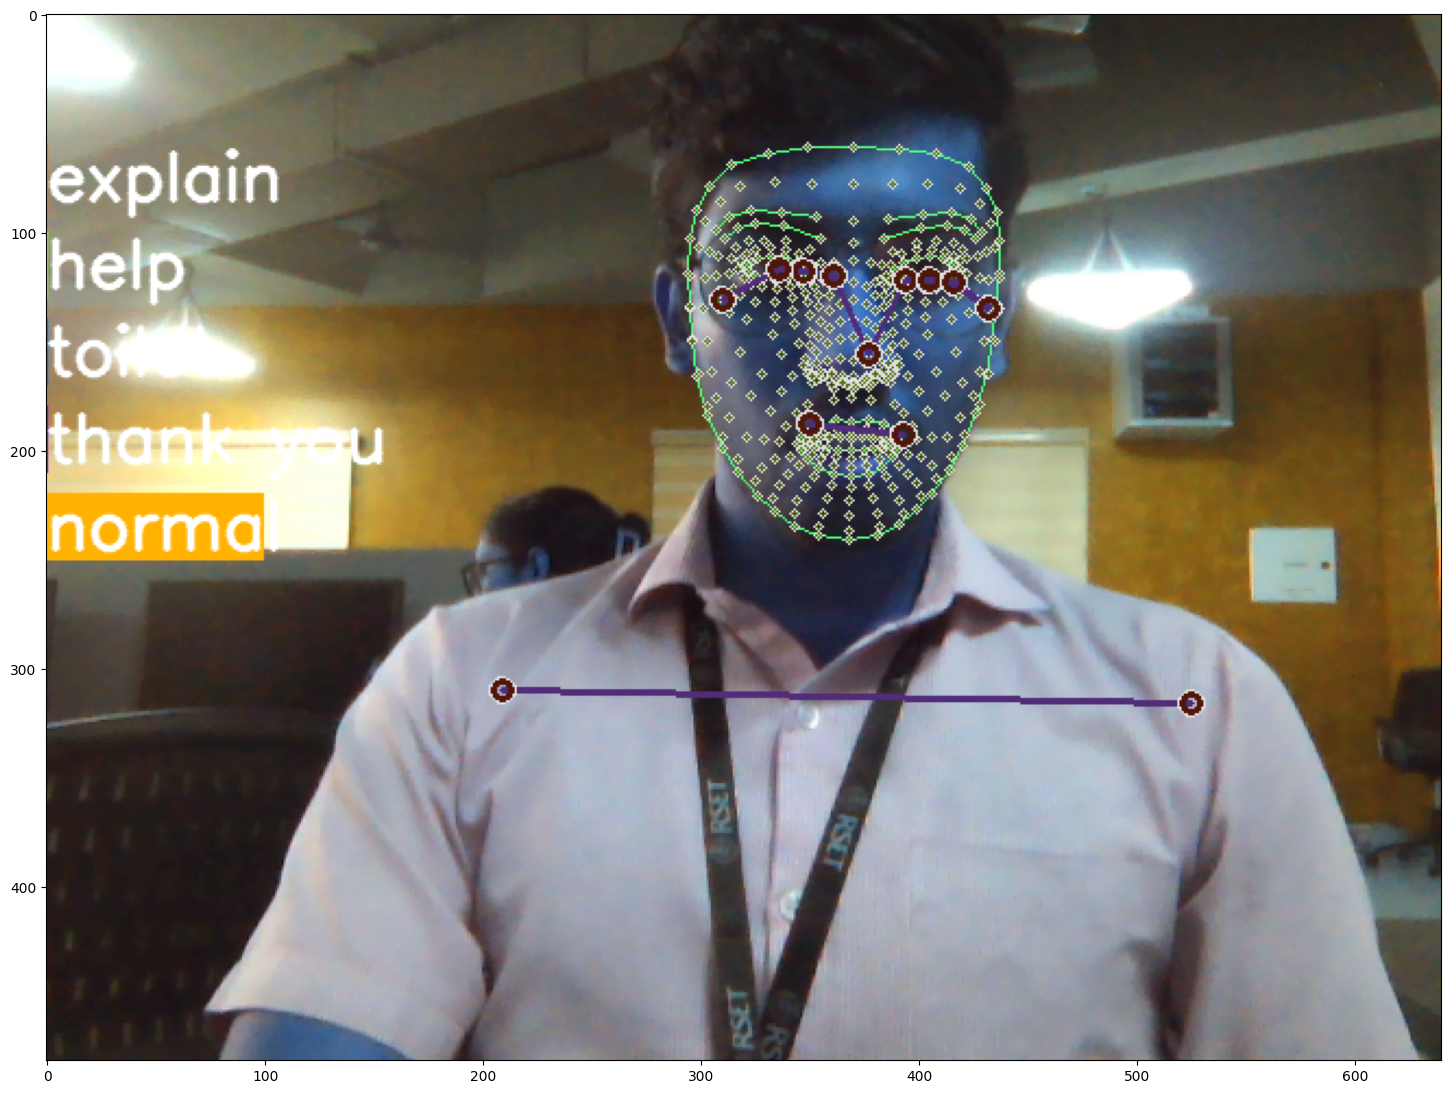

In [149]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [150]:
def speak(text):
    mp3_fp = BytesIO()
    tts = gTTS(text, lang='en')
    tts.write_to_fp(mp3_fp)
    return mp3_fp

In [151]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-15:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    valid_action = False
                    
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            valid_action = True
                    else:
                        valid_action = True
                        
                if valid_action :
                    sentence.append(actions[np.argmax(res)])
                    mixer.init()
                    sound = speak(sentence[-1])
                    sound.seek(0)
                    mixer.music.load(sound, "mp3")
                    mixer.music.play()

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open iris: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/iris_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/swrast_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/iris_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /home/jovanzac/anaconda3/envs/asl/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib64/dri/swrast_dri.so) (search paths /usr/lib64/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /home/jovanzac/ana

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [152]:
cap.release()
cv2.destroyAllWindows()